In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [6]:
df['target']=iris.target

In [7]:
df.shape

(150, 5)

C:\Users\hriti\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hriti\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


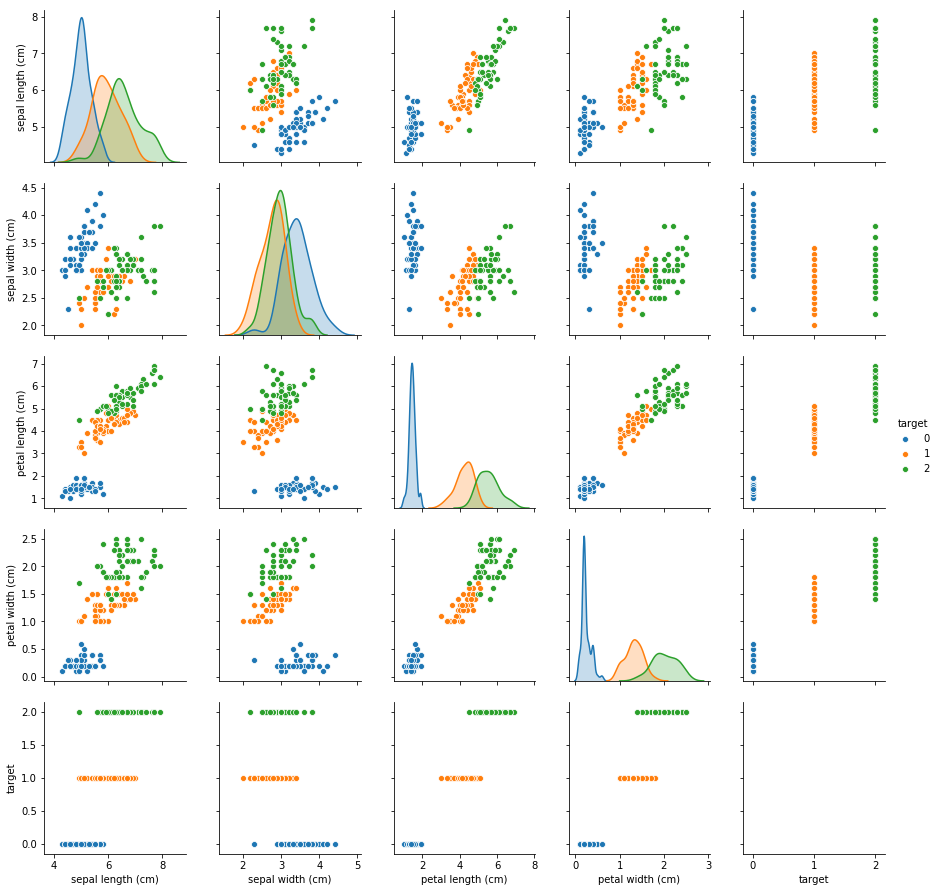

In [8]:
sns.pairplot(df,hue='target')

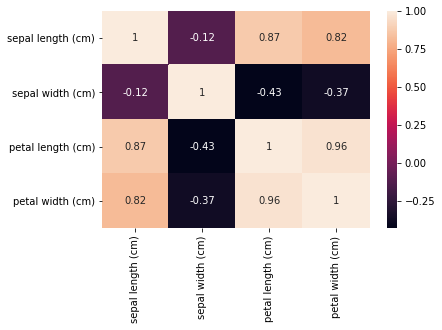

In [9]:
X=df.drop('target',axis=1)
y=df['target']
sns.heatmap(X.corr(),annot=True)

In [10]:
X=X.drop('petal width (cm)',axis=1)

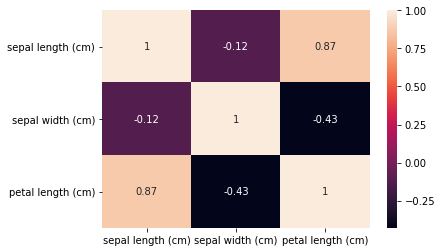

In [11]:
sns.heatmap(X.corr(),annot=True)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [13]:
model=[LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
model_name=['LogReg','RForest','DTree','KNN','SVC']

In [14]:
acc=[]
d={}
from sklearn.model_selection import train_test_split


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [27]:
acc_test=[]
acc_train=[]
from sklearn.metrics import accuracy_score
for i in range(len(model)):
    clf=model[i]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc_test.append(accuracy_score(pred,y_test))
    pred=clf.predict(X_train)
    acc_train.append(accuracy_score(pred,y_train))

C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [28]:
d={'Model':model_name,'ScoreTest':acc_test,'ScoreTrain':acc_train}
score=pd.DataFrame(d)

In [29]:
score

,Model,ScoreTest,ScoreTrain
0,LogReg,0.844444,0.885714
1,RForest,0.955556,0.990476
2,DTree,0.933333,1.000000
3,KNN,0.955556,0.952381
4,SVC,0.977778,0.961905


In [38]:
from sklearn.model_selection import GridSearchCV
param={'n_estimators':[80,100,120,150,200],'max_features':['auto','sqrt'],'min_samples_leaf':[1,2,3,4,5]}

In [39]:
grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param,cv=10)

In [40]:
grid.fit(X_train,y_train)

C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [80, 100, 120, 150, 200], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
grid.best_score_

0.9142857142857143

In [42]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
accuracy_score(pred,y_test)

C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9333333333333333

In [48]:
rf.base_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
from sklearn.datasets import load_diabetes

In [51]:
diabetes=load_diabetes()

In [53]:
diabetes.desc

AttributeError: describe